## Performing Analysis Of Meteorological Data

**Task** :-  we need to find whether the average Apparent temperature for the
month of a month say April starting from 2006 to 2016 and the average humidity for
the same period have increased or not.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline
import matplotlib.pyplot as plt 

/kaggle/input/weather-dataset/weatherHistory.csv


In [ ]:
path = '../input/weather-dataset/weatherHistory.csv'
df=pd.read_csv(path)

In [ ]:
df.sample(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
48014,2011-07-03 14:00:00.000 +0200,Mostly Cloudy,rain,22.194444,22.194444,0.39,17.3075,219.0,10.3523,0.0,1009.45,Mostly cloudy starting overnight.
25825,2008-09-18 01:00:00.000 +0200,Overcast,rain,9.333333,7.788889,0.89,10.3201,9.0,8.1949,0.0,1021.09,Mostly cloudy throughout the day.
91853,2016-07-03 08:00:00.000 +0200,Mostly Cloudy,rain,22.088889,22.088889,0.78,15.9551,321.0,9.9820,0.0,1013.62,Partly cloudy starting overnight.
12988,2007-07-31 04:00:00.000 +0200,Mostly Cloudy,rain,12.755556,12.755556,0.83,11.4149,290.0,15.8263,0.0,1017.61,Partly cloudy throughout the day.
56974,2012-07-08 22:00:00.000 +0200,Partly Cloudy,rain,27.050000,27.272222,0.47,11.0446,260.0,15.8263,0.0,1009.11,Partly cloudy starting in the morning.


This dataset provides historical data on many meteorological parameters such as pressure, temperature, humidity, wind_speed, visibility, etc. The dataset has hourly temperature recorded for last 10 years starting from 2006-04-01 00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200. It corresponds to Finland, a country in the Northern Europe.

In [ ]:
df.shape

(96453, 12)

In [ ]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

But before visualization, we need to make date features -> date time object . For this we use to_datetime() fn

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Setting index to Formatted Date

In [ ]:
df = df.set_index("Formatted Date")
df.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


Now since we have been given hourly data, we need to resample it monthly. Resampling is a convenient method for frequency conversion. Object must have a datetime like index

In [ ]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


Here "MS" denotes: Month starting We are displaying the average apparent temperature and humidity using mean() function.

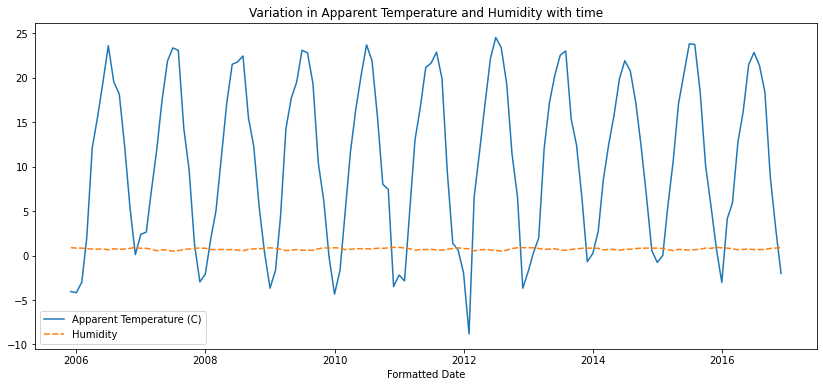

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

Observation : From the above plot, we can say that humidity remained almost constant in these years. Even the average apparent temperature is almost same (since peaks lie on the same line)

If we want to specifically retrieve the data of a particular month from every year, say April in this case then :

In [ ]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)
df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Plotting the variation in Apparent Temperature and Humidity for the month of April every year:

Text(0.5, 0, 'Month of April')

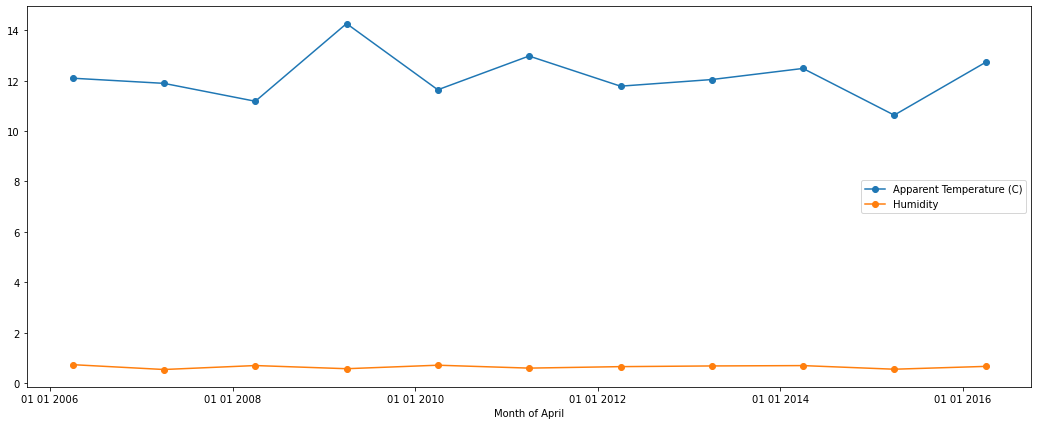

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
#ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc ='center right')
ax.set_xlabel('Month of April')

Observation : No change in average humidity. Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016 .

It is quite evident that there is a sharp rise in temp past 2010 whereas there is a fall over 2014 .
But let’s look at some more graphical visualization so get a better belief.

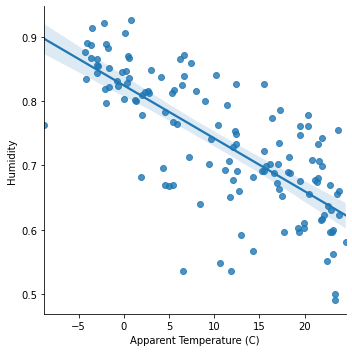

In [ ]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df_monthly_mean)
plt.show()

 Lm plot or reg plot is a statistical method for predictive analysis. Apparent temperature V/s Humidity

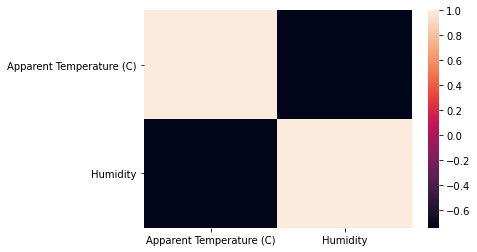

In [ ]:
corr = df_monthly_mean.corr()
sns.heatmap(corr)

A Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

Now let’s plot a dist plot using Seaborn library. A dist plot lets you see a histogram with a line over it.

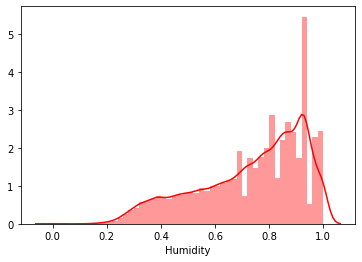

In [ ]:
sns.distplot(df.Humidity,color='red')

Summarising Humidity vs Temperature with the help of relplot() method

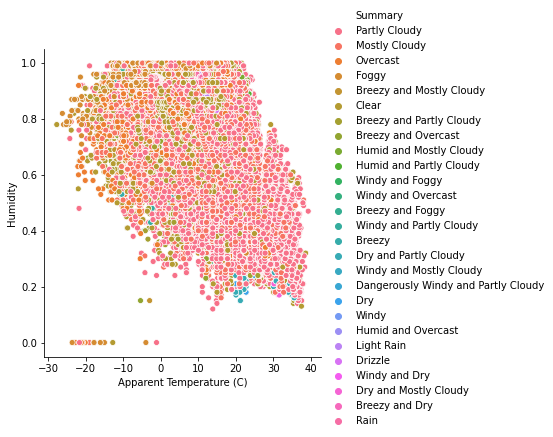

In [ ]:
sns.relplot(data=df,x="Apparent Temperature (C)",y="Humidity",color="purple",hue="Summary")

## Conclusion

Global warming is no doubt deteriorating the climate and is affecting various parameters of the environment.Hence from this analysis we infer that there are either sharp rise in temperatures or sharp falls over the 10 yrs. Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained same throughout the past years.